# Hypothesis Testing: Data Science salary comparision in different place.

## Section 1. Introduction

Focusing on comparing whether there is a difference data science job's salary in Europe and North America.

## Section 2. Preliminary Results

In [57]:
# load necessary packages
library(infer)
library(tidyverse)
library(cowplot)

In [6]:
raw_salary <- read.csv("https://raw.githubusercontent.com/YuluDuan/Hypothesis-Testing-New-York-City-Airbnb-booking-Prices/main/ds_salaries.csv")

head(raw_salary)

,X,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


In this project, as we would focus on analyzing the salary in both Europe and North America, it is important to first filter out all the data that belongs to that two countries and select the necessary column (i.e. location and salary_in_usd).

In [11]:
# by checking all the countries in this list, first find out the countries that belongs to Europe and North America.

unique(raw_salary$company_location)
na <- c("US", "MX","CA")
eur <- c("DE", "GB", "HU", "FR", "GR", "NL", "AT", "ES", "PT", "DK", "IT", "HR", "LU"
         ,"PL", "RO", "BE", "UA", "RU", "MT", "MD", "SI", "CH", "CZ", "EE", "IE")

[1] "DE" "JP" "GB" "HN" "US" "HU" "NZ" "FR" "IN" "PK" "CN" "GR" "AE" "NL" "MX"
[16] "CA" "AT" "NG" "ES" "PT" "DK" "IT" "HR" "LU" "PL" "SG" "RO" "IQ" "BR" "BE"
[31] "UA" "IL" "RU" "MT" "CL" "IR" "CO" "MD" "KE" "SI" "CH" "VN" "AS" "TR" "CZ"
[46] "DZ" "EE" "MY" "AU" "IE"

In [76]:
# fliter out all rows belong to Europe and North America, save them to a new column called "location"

ds_salary <- raw_salary %>%
    filter(company_location %in% append(na, eur)) %>%
    mutate(location = "North America")

ds_salary$location[ds_salary$company_location %in% eur] <- "Europe"

ds_salary$location <- as.factor(ds_salary$location)

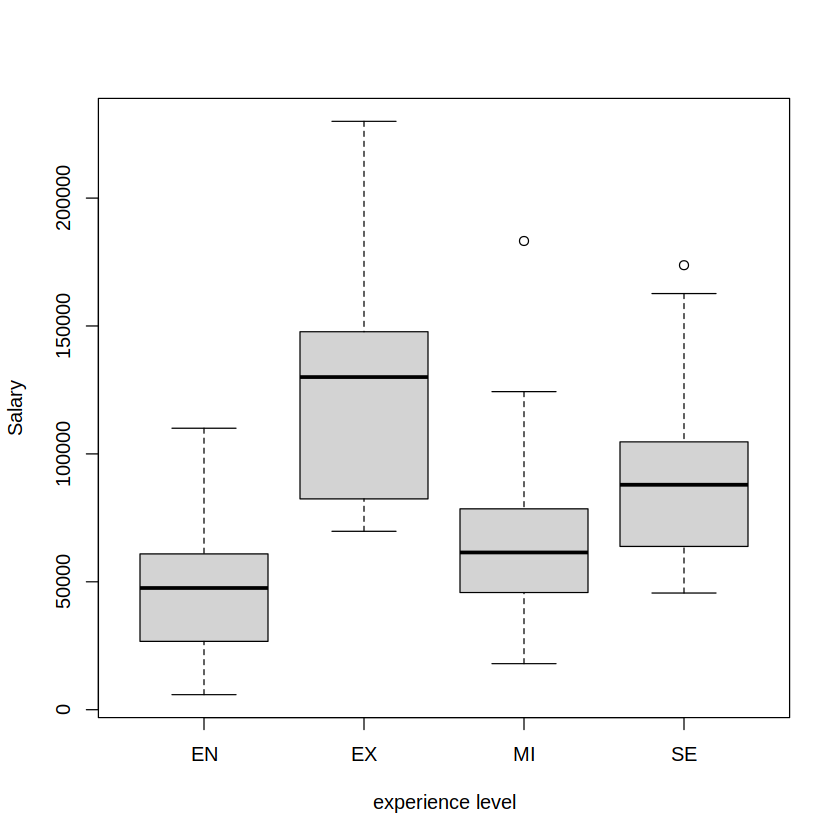

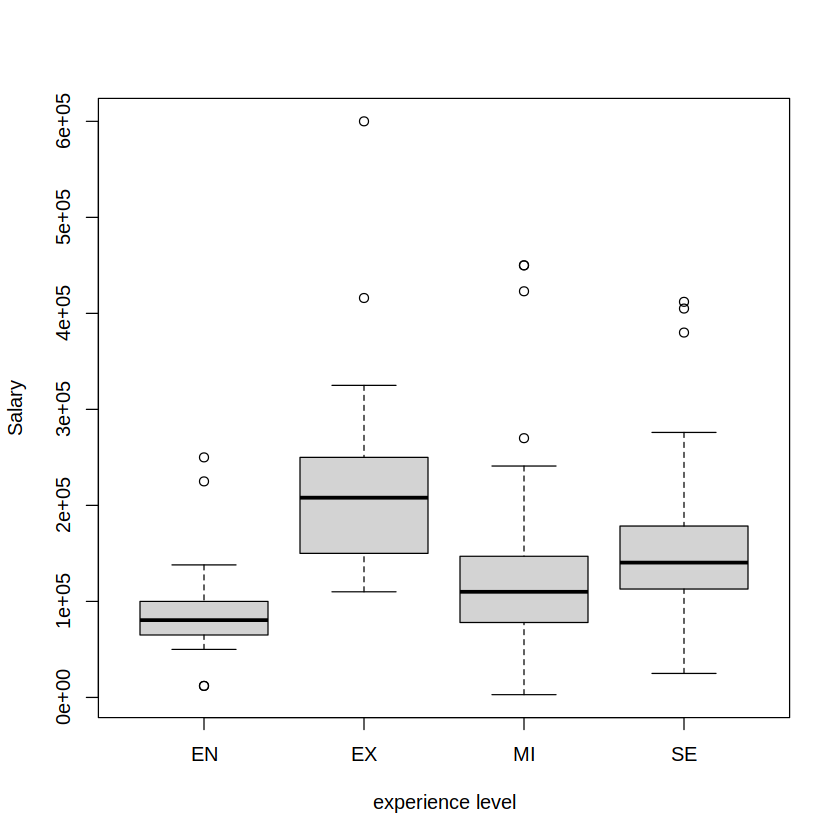

In [77]:
boxplot(ds_salary$salary_in_usd[ds_salary$location == "Europe"]  ~ ds_salary$experience_level[ds_salary$location == "Europe"], xlab = "experience level",
    ylab= "Salary")
boxplot(ds_salary$salary_in_usd[ds_salary$location == "North America"]  ~ ds_salary$experience_level[ds_salary$location == "North America"], , xlab = "experience level",
    ylab= "Salary") 

Looking at other factors in our dataset, we think the experience_level might be another factor that would influence the salary. By looking at the salary, we can see that the "EX" group deviates a lot from the other three groups. Hence, to control the influence of experience_level in our analysis, we decided to use data from experience_level of "EN", "MI" and "SE".

In [80]:
ds_final <- ds_salary %>%
    filter(experience_level != "EX") %>%
    select(salary_in_usd, location)
summary(ds_final$location)
head(ds_final)

Europe North America 
          150           370

,salary_in_usd,location
,<int>,<fct>
1,79833,Europe
2,109024,Europe
3,150000,North America
4,72000,North America
5,190000,North America
6,35735,Europe


Now, we get our final dataset, and we would now draw some plots to do some explanatory analysis.

## Section 3. Methods: Plan